In [1]:
from sqlalchemy import *
import numpy as np
import pylab as plt
import pandas as pd
%matplotlib inline

In [3]:
engine = create_engine('sqlite+pysqlite:///../SQL/88_8.db')
import time
start_time = time.time()
ADCdf = pd.io.sql.read_sql("SELECT * FROM ADC", engine)
Hitdf = pd.io.sql.read_sql("SELECT * FROM Hit", engine)
PSAdf = pd.io.sql.read_sql("SELECT * FROM PSA", engine)
ProtoMapdf = pd.io.sql.read_sql("SELECT * FROM ProtoMap", engine)
#RawADCdf = pd.io.sql.read_sql("SELECT * FROM RawADC", engine)
end_time = time.time()
print end_time-start_time

225.674790859


In [4]:
def Process(Event):
    mesh = Event.iloc[:,3:][Event.iloc[:,3:]>20].sum(axis=0)
    #print mesh
    return mesh
start_time = time.time()
mesh_df = ADCdf.groupby('EventID').apply(Process)
end_time = time.time()
print end_time-start_time

10.4206550121


In [5]:
def convolve(event):
    mesh_convol = np.convolve(event.values,([1]*10)[::-1],'same')
    return pd.Series(mesh_convol,index=['t'+str(i) for i in range(512)])
convol_df=mesh_df.apply(convolve,axis=1)
convol_df.reset_index(inplace=True)

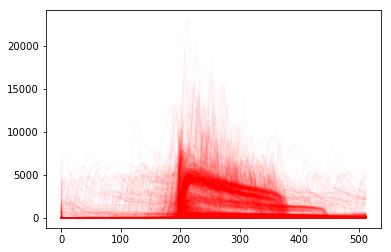

In [8]:
plt.plot(mesh_df.T.values,c=(1,0,0,0.03));

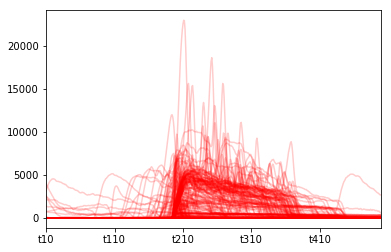

In [90]:
def pp(EID):
    mesh_df.iloc[EID,10:500].plot(c=(1,0,0,0.2))
    #ADCdf[ADCdf['EventID']==EID].sum(axis=0).iloc[10:500].plot(c=(0,1,0,0.2))
for i in range(300):
    pp(i)